# Exploratory Data Analysis

### Contexto

La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, en función de datos los fisiológicos de sus clientes, cuál va a ser la prima (coste) que debe asumir cada uno de ellos. Para ello, ha reunido a un equipo completo de médicos y en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto de datos para entrenar un modelo predictivo.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import OneHotEncoder
import json


## Importado de datos

In [88]:
# Importo el csv desde una URL y lo guardo

url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'

df = pd.read_csv(url, sep=',' )

# Guardo el archivo
df.to_csv('../data/raw/Data.csv', index = False )

## Analisis de datos

In [89]:
#Compruebo que todo este correcto y doy contexto
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [90]:
# Compruebo duplicados
df.duplicated().sum()

np.int64(1)

In [91]:
# Elimino el duplicado
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [92]:
# Informacion de la estructura del DataFrame
print(df.shape)
print(df.info())

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Podemos comprobar que no disponemos de valores nulos en nuestro dataset.

El target es charges que es un valor numerico, por lo tanto solo voy a cambiar el nombre a target para que sea mas claro.

In [93]:
df.rename(columns={'charges': 'target'}, inplace=True)

Text(0, 0.5, 'Frecuencia')

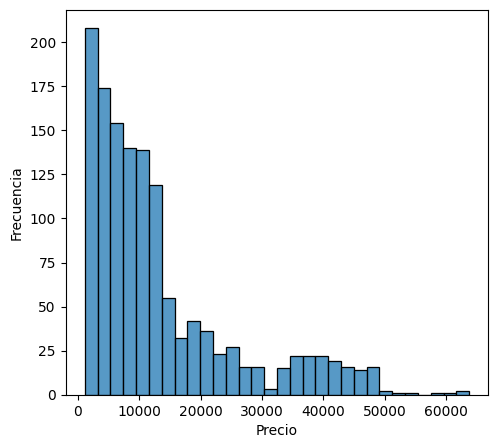

In [94]:
plt.figure(figsize=(12, 5))

# Subgráfico 1: Histograma y KDE
plt.subplot(1, 2, 1)
sns.histplot(df['target'], bins=30)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

Represento el grafico de precio y su frecuencia, lo que se puede observar es que hay una gran cantidad de valores alrededor de los 0 - 150k, y hay muy poca cantidad en los valores más altos, lo que significa que probablemente nos encontremos con outliers.

## Analisis de Variables Categoricas

In [95]:
# Lista con mis columnas categoricas 
cat_var = ['sex', 'smoker', 'region']

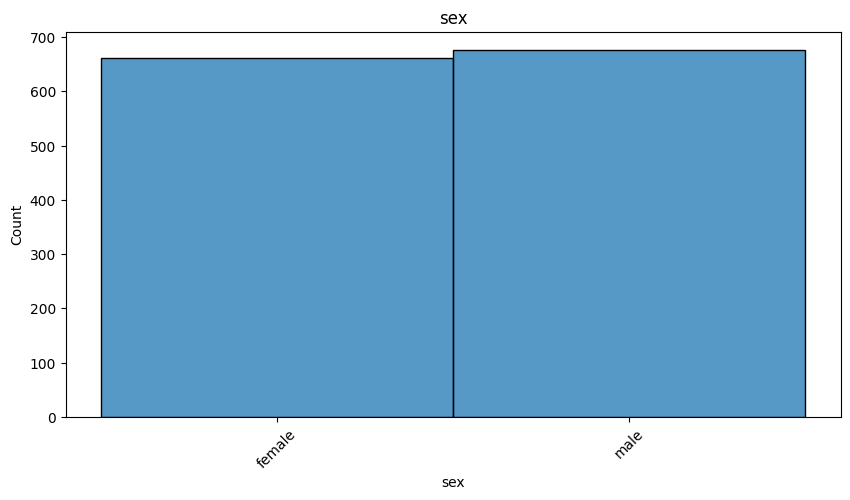

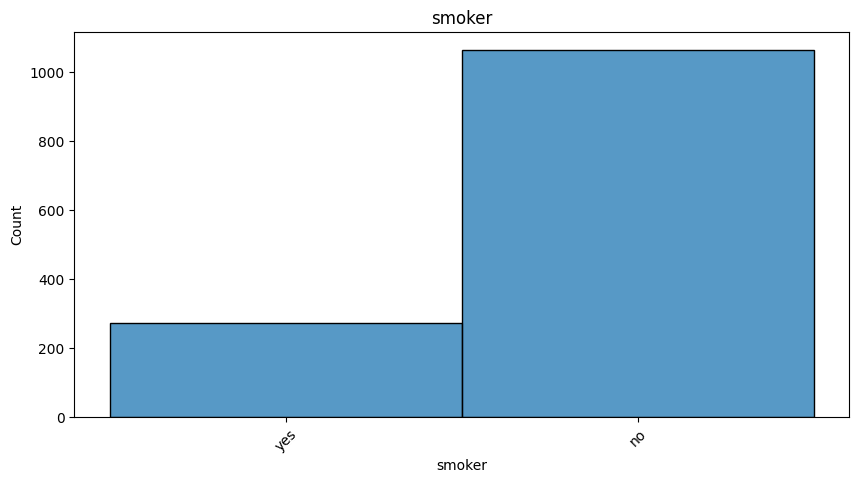

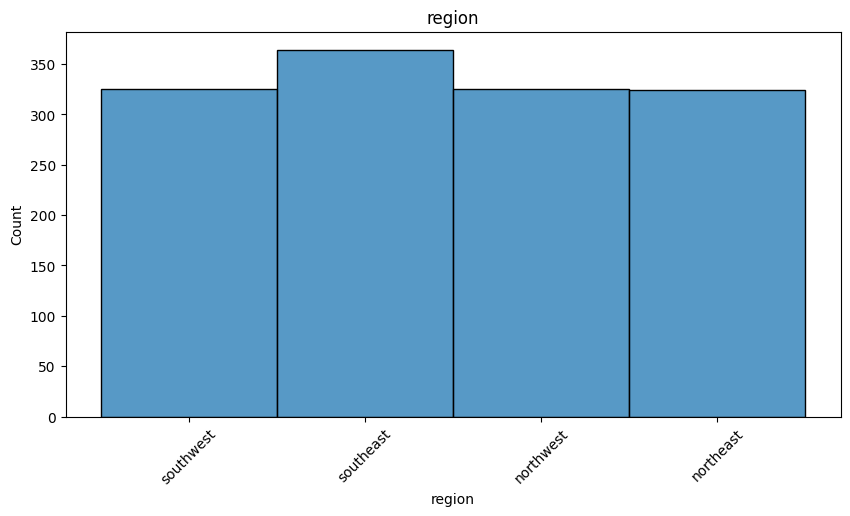

In [96]:
for var in cat_var:
    fig, ax = plt.subplots(1, 1, figsize = (10, 5))
    sns.histplot(data=df, x = var)
    ax.set_title(var)
    plt.xticks(rotation=45)
    plt.show()

Se puede observar que salvo la clasificacion de smoker, el resto estan equilibradas. Ademas solo una de ellas no es binomial, por lo tanto en caso de realizar OneHotEncoding, no aumentara demasiado las proporciones de dataset.

## Analisis de Variables Numericas

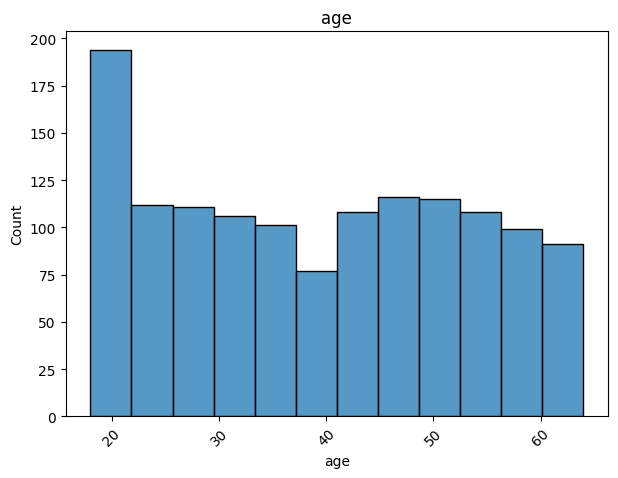

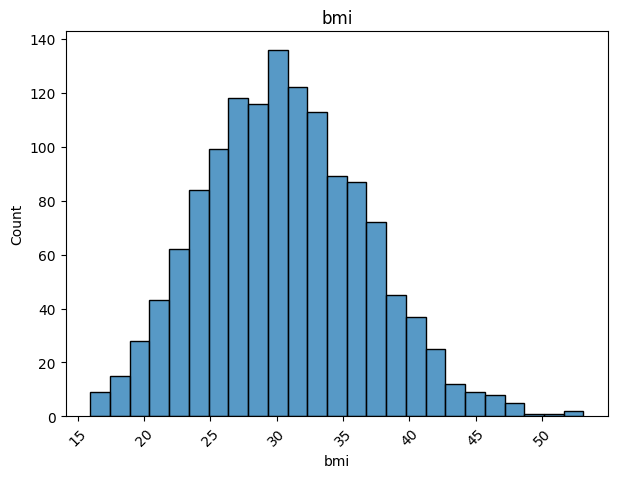

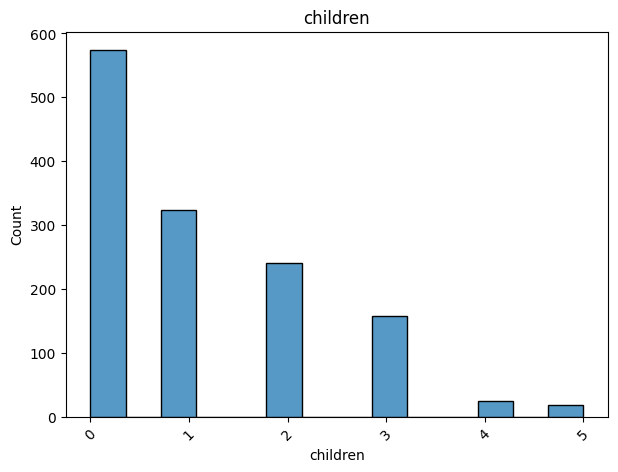

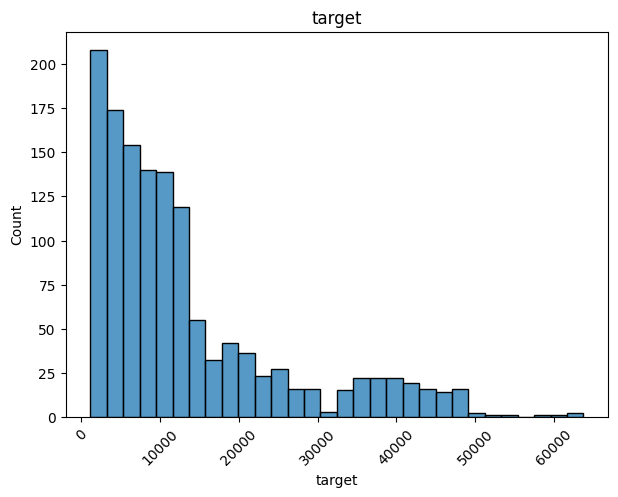

In [97]:
num_var = ['age', 'bmi', 'children', 'target']

for var in num_var:
    fig, ax = plt.subplots(1, 1, figsize = (7, 5))
    sns.histplot(data=df, x = var)
    ax.set_title(var)
    plt.xticks(rotation=45)
    plt.show()

## Analisis de variables multivariante

In [98]:
# num_var = ['age', 'bmi', 'children', 'target']
# cat_var = ['sex', 'smoker', 'region']

Podemos observar una distribucion normal en todas las variables menos en la edad.

En este caso pasare directamente al analisis numerico - numerico, ya que mi target es numerica y posteriormente al numerico - categorico

### Analisis numerico - numerico

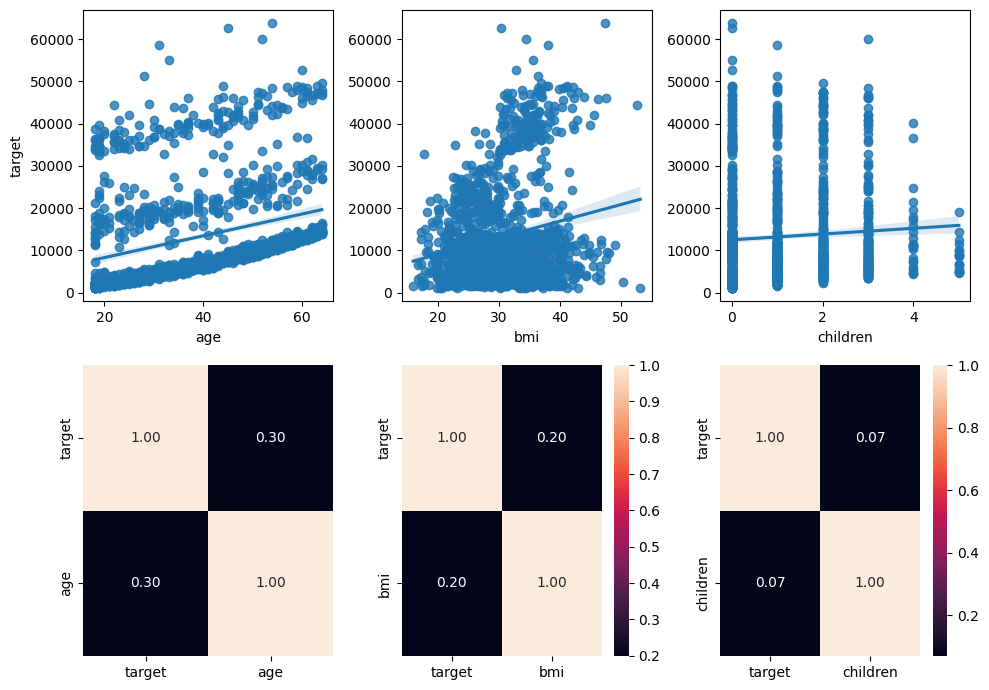

In [99]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "target")
sns.heatmap(df[["target", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "bmi", y = "target").set(ylabel=None)
sns.heatmap(df[["target", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 2], data = df, x = "children", y = "target").set(ylabel=None)
sns.heatmap(df[["target", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Podemos observar lo siguiente:
- Hay una correlacion directa entre una mayor edad y un mayor precio en el seguro.
- Hay una correlacion entre un mayor bmi(body mass calculator) y un mayor precio del seguro.
- En cuanto a los numero de niños dependientes, hay una correlacion entre mayor numero de niños y mayor precio del seguro, pero es pequeña.

## Numerico - Categorico

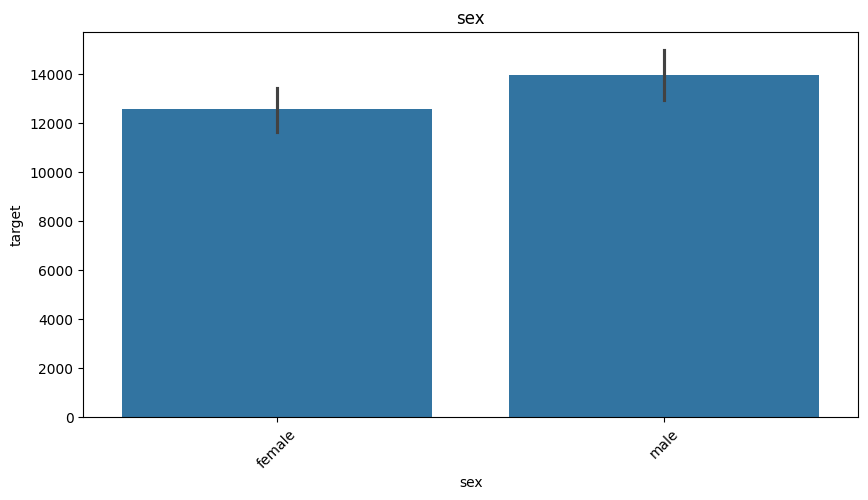

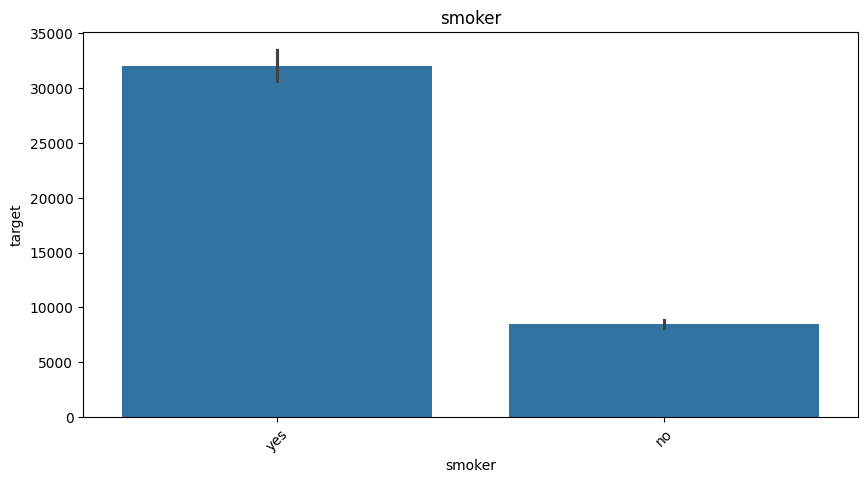

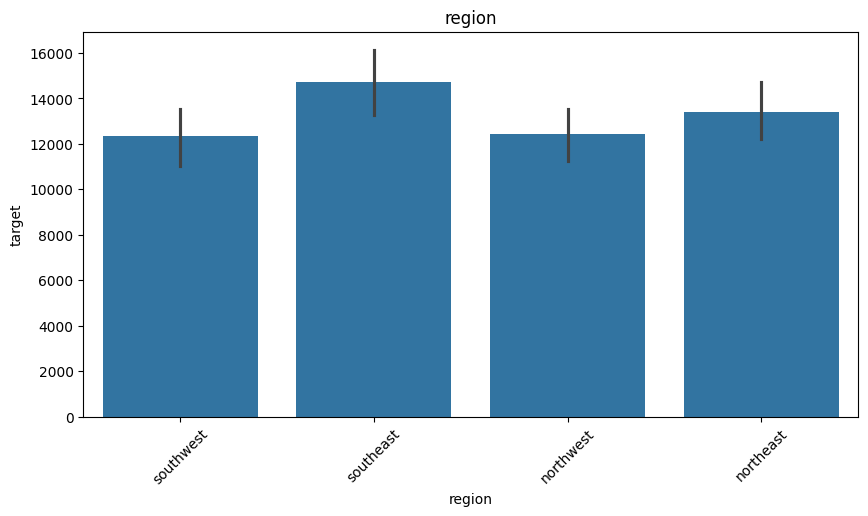

In [100]:
for var in cat_var:
    fig, ax = plt.subplots(1, 1, figsize = (10, 5))
    sns.barplot(data=df, x = var, y = df['target'])
    ax.set_title(var)
    plt.xticks(rotation=45)
    plt.show()

Podemos observar lo siguiente:
- El seguro es de media mas caro en hombres que en mujeres por un pequeño margen
- Los fumadores tienen un seguro de media 3 veces mas caro que los no fumadores
- El seguro es un poco mas caro en la region de southeast.

Usare OneHotEncoder para transformar los valores categoricos en numericos, guardando mi encoder en formato pickle para usarlo en caso de obtener nuevos datos

In [101]:
# Creo la funcion para que me haga la transformacion
def onehot_encode_and_pickle(df, cat_vars, encoder_filename='encoder.pkl', drop_original=True, drop_first=True):
    """
    Aplica one-hot encoding a las columnas categóricas especificadas, guarda el encoder usando pickle 
    y retorna el DataFrame transformado junto con el encoder entrenado.
    
    Args:
        df (pd.DataFrame): DataFrame de entrada.
        cat_vars (list): Lista de nombres de columnas categóricas a transformar.
        encoder_filename (str): Ruta y nombre del archivo para guardar el encoder (por defecto 'encoder.pkl').
        drop_original (bool): Si True, elimina las columnas originales después de la transformación (por defecto True).
        drop_first (bool): Si True, elimina la primera categoría de cada variable para evitar la trampa de las dummies (por defecto True).
        
    Returns:
        df_transformed (pd.DataFrame): DataFrame con las nuevas columnas codificadas.
        encoder (OneHotEncoder): Objeto encoder entrenado.
    """
    # Inicializamos el OneHotEncoder usando sparse_output en vez de sparse
    encoder = OneHotEncoder(drop='first' if drop_first else None, sparse_output=False)
    
    # Ajustamos el encoder y transformamos las columnas categóricas
    encoded_array = encoder.fit_transform(df[cat_vars])
    
    # Obtenemos los nombres de las nuevas columnas codificadas
    encoded_feature_names = encoder.get_feature_names_out(cat_vars)
    
    # Creamos un DataFrame con los datos codificados
    df_encoded = pd.DataFrame(encoded_array, columns=encoded_feature_names, index=df.index)
    
    # Concatenamos el DataFrame original con el DataFrame de variables codificadas
    df_transformed = pd.concat([df, df_encoded], axis=1)
    
    # Eliminamos las columnas originales si se indica
    if drop_original:
        df_transformed.drop(columns=cat_vars, inplace=True)
    
    # Guardamos el objeto encoder utilizando pickle
    with open(encoder_filename, 'wb') as f:
        pickle.dump(encoder, f)
    
    return df_transformed, encoder


df_transformed, encoder = onehot_encode_and_pickle(df, cat_var, encoder_filename='encoder.pkl', drop_original=True, drop_first=True)

# Para ver las equivalencias de cada variable:
print(encoder.categories_)

[array(['female', 'male'], dtype=object), array(['no', 'yes'], dtype=object), array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]


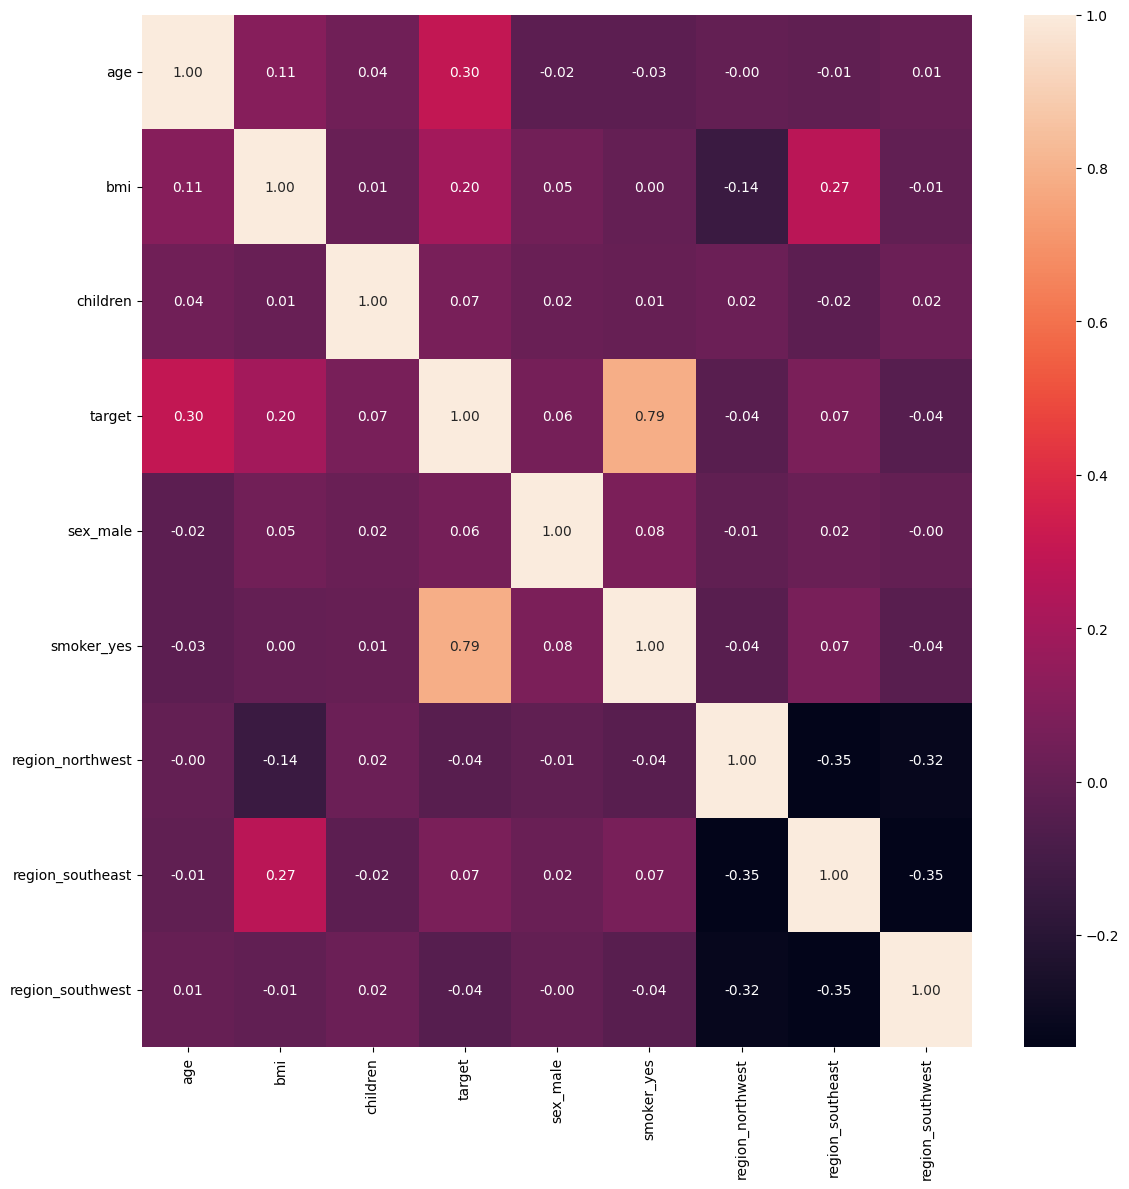

In [102]:
# Uso el nuevo dataframe con los valores encoded
# Creamos el heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df_transformed.corr(), annot=True, fmt=".2f")
plt.tight_layout()
plt.show() 

Podemos observar que la target tiene una correlacion con la edad, el bmi y fumar.

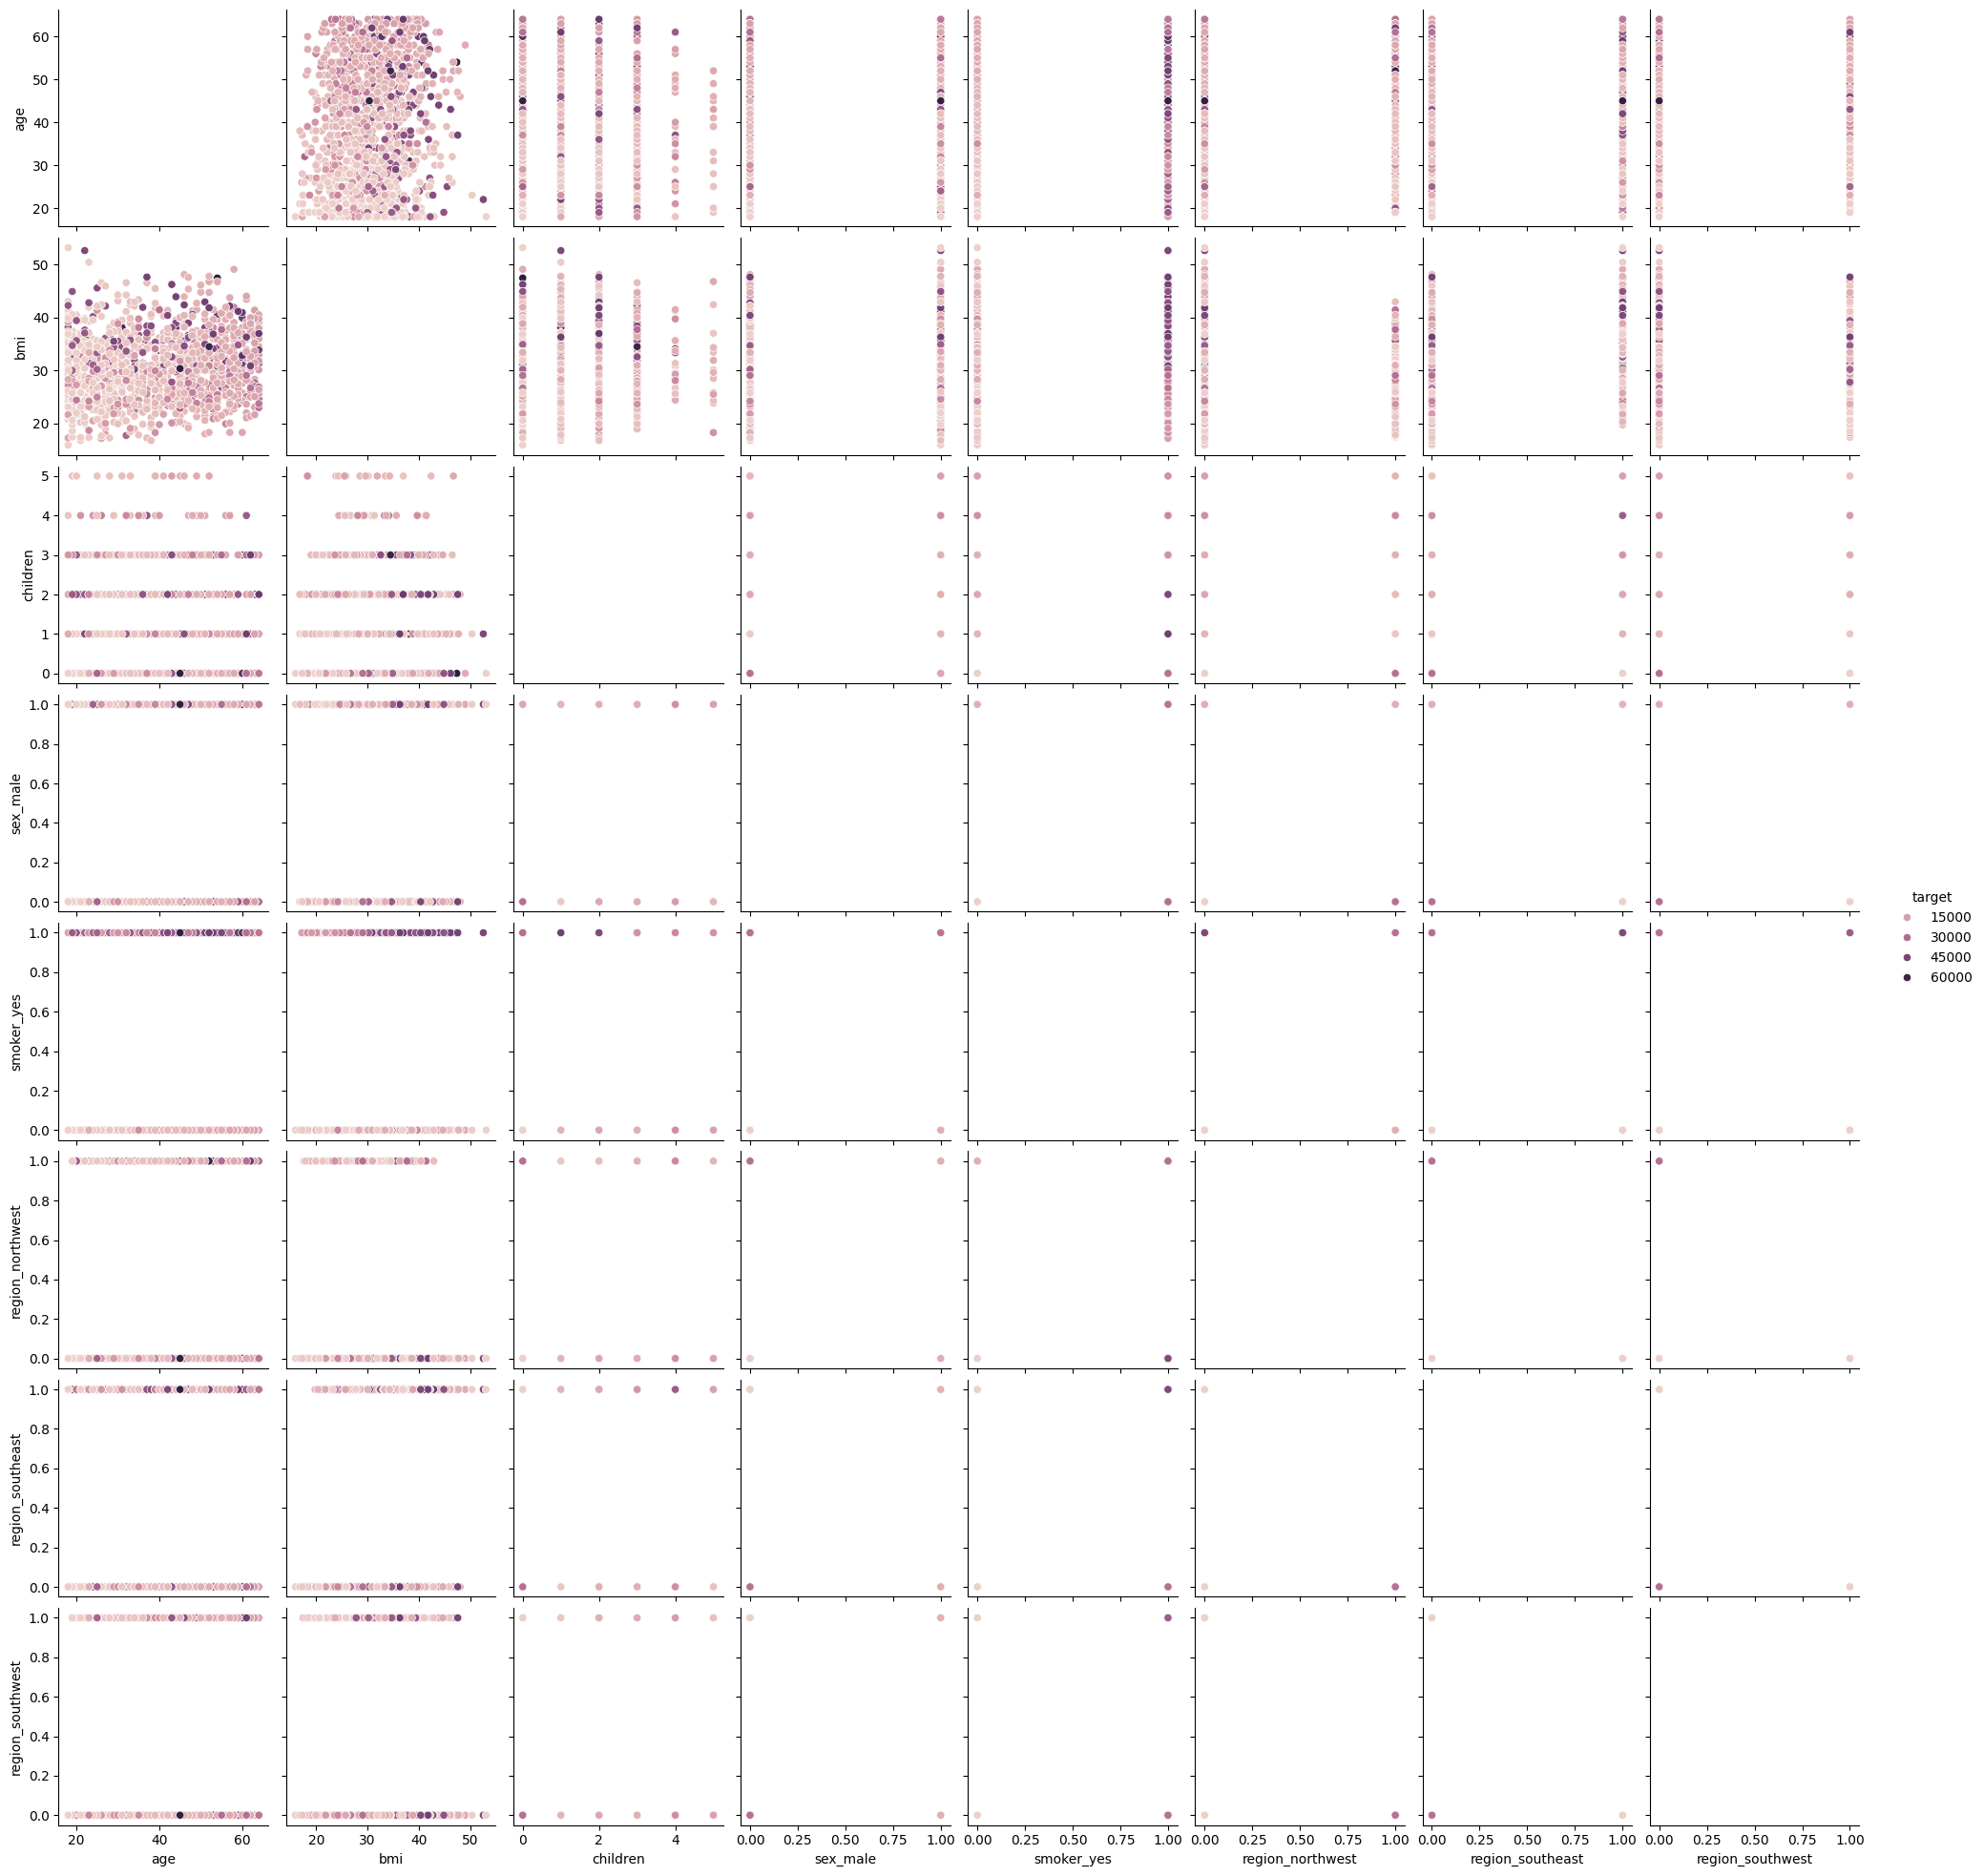

In [103]:
sns.pairplot(data = df_transformed, hue="target")


## Analisis de Outliers

Lo siguiente sera analizar los outliers en mis variables numericas

In [104]:
num_var

['age', 'bmi', 'children', 'target']

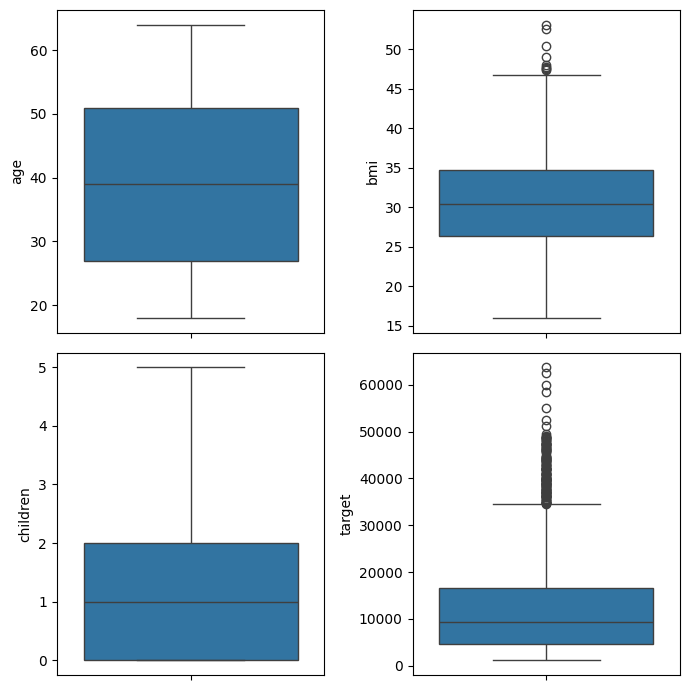

In [105]:
fig, axes = plt.subplots(2, 2, figsize = (7, 7))

sns.boxplot(ax = axes[0, 0], data = df, y = "age")
sns.boxplot(ax = axes[0, 1], data = df, y = "bmi")
sns.boxplot(ax = axes[1, 0], data = df, y = "children")
sns.boxplot(ax = axes[1, 1], data = df, y = "target")
plt.tight_layout()

plt.show()

Observo outliers en la target y en el BMI.

Considero que no tengo suficientes datos como para eliminar los outliers en mi target, por lo tanto solo eliminare los que tengo en BMI, si tras observar los resultados en mi modelo considero que eliminar outliers en mi target puede ayudar a mejorar el rendimiento revisare este paso.

## Preparacion de mis datasets

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest

var_continous = ['age', 'bmi', 'children']

dummy_cols = encoder.get_feature_names_out(cat_var)
features = var_continous + list(dummy_cols)

In [107]:
features

['age',
 'bmi',
 'children',
 'sex_male',
 'smoker_yes',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [108]:
df_transformed

,age,bmi,children,target,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,0.0,0.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,0.0,0.0,0.0,0.0,1.0


### Division Con/Sin outliers

In [109]:
total_data_con_outliers = df_transformed.copy()
total_data_sin_outliers = df_transformed.copy()

def replace_outliers_from_column(column, df):
    stats = df[column].describe()
    iqr = stats["75%"] - stats["25%"]
    upper_limit = stats["75%"] + 1.5 * iqr
    lower_limit = stats["25%"] - 1.5 * iqr
    if lower_limit < 0:
        lower_limit = df[column].min()
    df[column] = df[column].apply(lambda x: x if x <= upper_limit else upper_limit)
    df[column] = df[column].apply(lambda x: x if x >= lower_limit else lower_limit)
    return df.copy(), [lower_limit, upper_limit]

# Para la versión SIN outliers (se reemplazan los outliers en las columnas numéricas)
outliers_dict = {}
for col in num_var:
    total_data_sin_outliers, limits = replace_outliers_from_column(col, total_data_sin_outliers)
    outliers_dict[col] = limits

# Guardamos la información de reemplazo de outliers en JSON (convertida a tipos nativos)
outliers_dict_serializable = {col: [float(l), float(u)] for col, (l, u) in outliers_dict.items()}
with open("../data/outliers_replacement.json", "w") as f:
    json.dump(outliers_dict_serializable, f)

Division Train/Test

In [110]:
y = total_data_con_outliers['target']

# Usamos la versión CON outliers para la partición (se aplicará la misma partición a la versión SIN)
X_con_outliers = total_data_con_outliers[features]
X_sin_outliers = total_data_sin_outliers[features]

X_train_con_raw, X_test_con_raw, y_train, y_test = train_test_split(X_con_outliers, y, test_size=0.2, random_state=42)
# Para la versión SIN outliers usamos los mismos índices
X_train_sin_raw = X_sin_outliers.loc[X_train_con_raw.index]
X_test_sin_raw  = X_sin_outliers.loc[X_test_con_raw.index]


# Guardamos los targets por separado
y_train.to_excel("../data/processed/y_train.xlsx", index=False)
y_test.to_excel("../data/processed/y_test.xlsx", index=False)

### Normalizacion

In [111]:
def normalize_data(X_train, X_test, numeric_columns, scaler_filename):
    scaler = StandardScaler()
    scaler.fit(X_train[numeric_columns])
    with open(scaler_filename, "wb") as file:
        pickle.dump(scaler, file)
    X_train_num = pd.DataFrame(scaler.transform(X_train[numeric_columns]), 
                               index=X_train.index, columns=numeric_columns)
    X_test_num = pd.DataFrame(scaler.transform(X_test[numeric_columns]), 
                              index=X_test.index, columns=numeric_columns)
    X_train_norm = X_train.copy()
    X_test_norm = X_test.copy()
    X_train_norm[numeric_columns] = X_train_num
    X_test_norm[numeric_columns] = X_test_num
    return X_train_norm, X_test_norm

# Rama CON outliers
X_train_con_norm, X_test_con_norm = normalize_data(
    X_train_con_raw, X_test_con_raw, var_continous, "../models/normalizador_con_outliers.pkl"
)
# Rama SIN outliers
X_train_sin_norm, X_test_sin_norm = normalize_data(
    X_train_sin_raw, X_test_sin_raw, var_continous, "../models/normalizador_sin_outliers.pkl"
)

In [112]:
def minmax_scale_data(X_train, X_test, numeric_columns, scaler_filename):
    scaler = MinMaxScaler()
    scaler.fit(X_train[numeric_columns])
    with open(scaler_filename, "wb") as file:
        pickle.dump(scaler, file)
    X_train_num = pd.DataFrame(scaler.transform(X_train[numeric_columns]), 
                               index=X_train.index, columns=numeric_columns)
    X_test_num = pd.DataFrame(scaler.transform(X_test[numeric_columns]), 
                              index=X_test.index, columns=numeric_columns)
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    X_train_scaled[numeric_columns] = X_train_num
    X_test_scaled[numeric_columns] = X_test_num
    return X_train_scaled, X_test_scaled

# Rama CON outliers
X_train_con_scal, X_test_con_scal = minmax_scale_data(
    X_train_con_raw, X_test_con_raw, var_continous, "../models/minmax_scaler_con.pkl"
)
# Rama SIN outliers
X_train_sin_scal, X_test_sin_scal = minmax_scale_data(
    X_train_sin_raw, X_test_sin_raw, var_continous, "../models/minmax_scaler_sin.pkl"
)

In [113]:
# Versión CON outliers:
# - RAW (One-Hot): X_train_con_outliers_raw_oh.xlsx y X_test_con_outliers_raw_oh.xlsx
# - NORM (One-Hot): X_train_con_outliers_norm_oh.xlsx y X_test_con_outliers_norm_oh.xlsx
# - SCAL (One-Hot): X_train_con_outliers_scal_oh.xlsx y X_test_con_outliers_scal_oh.xlsx
X_train_con_raw.to_excel("../data/processed/X_train_con_outliers_raw.xlsx", index=False)
X_test_con_raw.to_excel("../data/processed/X_test_con_outliers_raw.xlsx", index=False)
X_train_con_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index=False)
X_test_con_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index=False)
X_train_con_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index=False)
X_test_con_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index=False)

# Versión SIN outliers:
# - RAW (One-Hot): X_train_sin_outliers_raw_oh.xlsx y X_test_sin_outliers_raw_oh.xlsx
# - NORM (One-Hot): X_train_sin_outliers_norm_oh.xlsx y X_test_sin_outliers_norm_oh.xlsx
# - SCAL (One-Hot): X_train_sin_outliers_scal_oh.xlsx y X_test_sin_outliers_scal_oh.xlsx
X_train_sin_raw.to_excel("../data/processed/X_train_sin_outliers_raw.xlsx", index=False)
X_test_sin_raw.to_excel("../data/processed/X_test_sin_outliers_raw.xlsx", index=False)
X_train_sin_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index=False)
X_test_sin_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index=False)
X_train_sin_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index=False)
X_test_sin_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index=False)

#########################################
# Fin del Pipeline
#########################################

# Ejemplo de visualización (opcional)
print("Ejemplo TRAIN CON outliers (MinMax + One-Hot final):")
print(X_train_con_scal.head())
print("\nEjemplo TRAIN SIN outliers (MinMax + One-Hot final):")
print(X_train_sin_scal.shape)

Ejemplo TRAIN CON outliers (MinMax + One-Hot final):
           age       bmi  children  sex_male  smoker_yes  region_northwest  \
560   0.608696  0.107345       0.4       0.0         0.0               1.0   
1285  0.630435  0.224913       0.0       0.0         0.0               0.0   
1142  0.739130  0.239440       0.0       0.0         0.0               0.0   
969   0.456522  0.493947       1.0       0.0         0.0               0.0   
486   0.782609  0.148238       0.6       0.0         0.0               1.0   

      region_southeast  region_southwest  
560                0.0               0.0  
1285               0.0               0.0  
1142               1.0               0.0  
969                1.0               0.0  
486                0.0               0.0  

Ejemplo TRAIN SIN outliers (MinMax + One-Hot final):
(1070, 8)
